In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
dataset =  pd.read_csv('mmm.csv')
dataset.head(3)

,rollno,name,sci,eng,math,nep,total
0,1,Anisha Sharma,88,76,91,83,338
1,2,Sagar Thapa,67,76,65,72,280
2,3,Ritika Karki,88,89,95,83,355


In [45]:
sample_data_without_rep= dataset.sample(n=8)
sample_data_rep= dataset.sample(n=8,replace = True )
sample_data_without_rep,sample_data_rep

(    rollno             name  sci  eng  math  nep  total
 4        5  Manish Bhandari   67   82    77   83    309
 18      19    Laxmi Neupane   63   65    60   64    252
 12      13         Nisha KC   82   85    88   83    338
 8        9        Kamal Rai   55   48    42   53    198
 10      11  Rajendra Basnet   67   60    65   70    262
 2        3     Ritika Karki   88   89    95   83    355
 7        8     Pooja Gurung   88   89    89   91    357
 11      12     Bibek Kharel   58   60    58   59    235,
     rollno             name  sci  eng  math  nep  total
 0        1    Anisha Sharma   88   76    91   83    338
 16      17    Sneha Acharya   88   89    92   91    360
 9       10  Sunita Adhikari   73   75    74   70    292
 7        8     Pooja Gurung   88   89    89   91    357
 4        5  Manish Bhandari   67   82    77   83    309
 15      16    Prakash Yadav   55   57    50   53    215
 10      11  Rajendra Basnet   67   60    65   70    262
 11      12     Bibek Kharel  

In [46]:
import numpy as np

# Normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

print("Mean:", data.mean(), "Std Dev:", data.std())


Mean: -0.03486053000272515 Std Dev: 1.0090429280257363


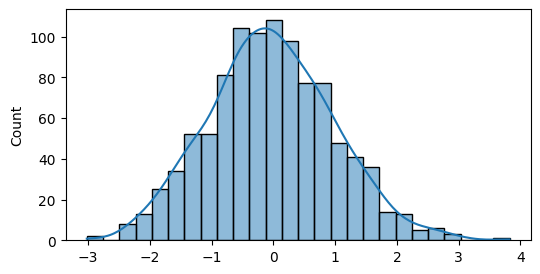

In [47]:
plt.figure(figsize=(6,3))
sns.histplot(data, kde=True)
plt.show()


**#covariance**   
A measure of how two variables change together.
It tells you direction of the relationship:

Positive → when one increases, the other tends to increase.

Negative → when one increases, the other tends to decrease.  

**Correlation**   
It analysis is a way of checking how strongly two numbers-based things move together.
In simple words: it tells you whether, and how much, one continuous variable changes when the other changes.

In [48]:
dataset.isnull().sum()

rollno    0
name      0
sci       0
eng       0
math      0
nep       0
total     0
dtype: int64

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rollno  20 non-null     int64 
 1   name    20 non-null     object
 2   sci     20 non-null     int64 
 3   eng     20 non-null     int64 
 4   math    20 non-null     int64 
 5   nep     20 non-null     int64 
 6   total   20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [50]:
data_corr=dataset.select_dtypes('int64').corr()
data_corr

,rollno,sci,eng,math,nep,total
rollno,1.000000,-0.329186,-0.232833,-0.287243,-0.261880,-0.288775
sci,-0.329186,1.000000,0.857603,0.921901,0.900657,0.954296
eng,-0.232833,0.857603,1.000000,0.907340,0.917128,0.952941
math,-0.287243,0.921901,0.907340,1.000000,0.929122,0.977389
nep,-0.261880,0.900657,0.917128,0.929122,1.000000,0.970913
total,-0.288775,0.954296,0.952941,0.977389,0.970913,1.000000


In [51]:
data_cov=dataset.select_dtypes('int64').cov()
data_cov

,rollno,sci,eng,math,nep,total
rollno,35.000000,-25.000000,-17.131579,-26.394737,-20.026316,-88.552632
sci,-25.000000,164.789474,136.921053,183.815789,149.447368,634.973684
eng,-17.131579,136.921053,154.681579,175.276316,147.439474,614.318421
math,-26.394737,183.815789,175.276316,241.250000,186.539474,786.881579
nep,-20.026316,149.447368,147.439474,186.539474,167.081579,650.507895
total,-88.552632,634.973684,614.318421,786.881579,650.507895,2686.681579


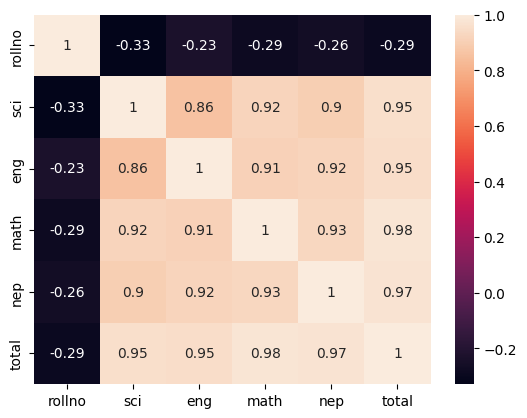

In [52]:
sns.heatmap(data_corr,annot=True)
plt.show()

**center limit theorem**   
If you take lots of random samples from any kind of data and calculate the average of each sample,
those averages will form a bell-shaped curve (almost like a normal distribution),
centered around the true average of the whole population—
especially when your samples are big enough.

In [53]:
pop_data= [np.random.randint(10,100) for i in range(10000)]
pop_table = pd.DataFrame({"pop_data":pop_data})
pop_table

,pop_data
0,94
1,91
2,98
3,61
4,13
...,...
9995,69
9996,50
9997,58
9998,19


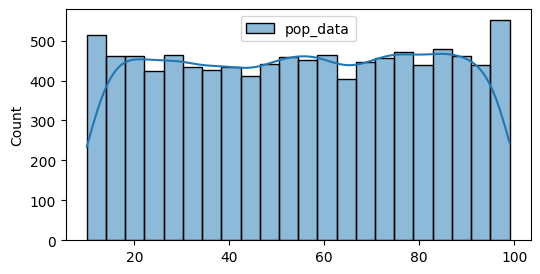

In [54]:
plt.figure(figsize=(6,3))
sns.histplot(pop_table, kde=True)
plt.show()

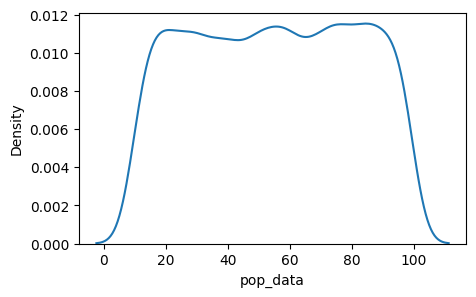

In [55]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=pop_table ,x='pop_data')
plt.show()


In [56]:
sample_mean= []
for i in range(50):
    sample_data=[]
    for data in range(600):
        sample_data.append(np.random.choice(pop_data))
    sample_mean.append(np.mean(sample_data))
    

In [63]:
sample_Mean = pd.DataFrame({'sample_mean':sample_mean})
sample_Mean.head()

,sample_mean
0,54.811667
1,54.555000
2,54.091667
3,54.873333
4,56.066667


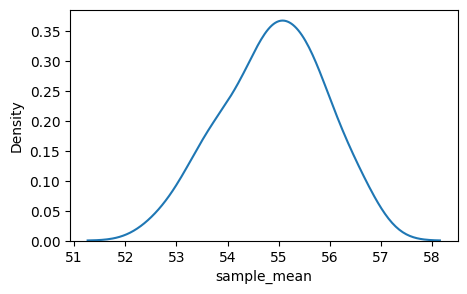

In [58]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=sample_Mean ,x='sample_mean')
plt.show()

In [60]:
sample_mean_2=[]
for i in range(50):
    sample_data_2= pop_table.sample(100)
    sample_mean_2.append(np.mean(sample_data_2))
    

In [67]:
sample_Mean_2 = pd.DataFrame({'sample_mean_2':sample_mean_2})
sample_Mean_2.head()

,sample_mean_2
0,50.22
1,53.94
2,54.33
3,54.78
4,54.54


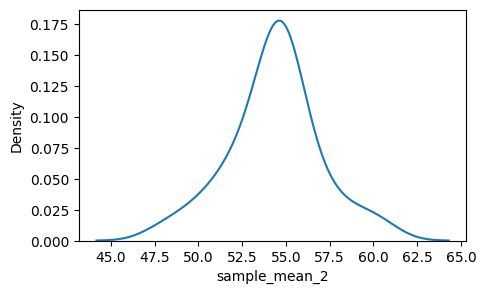

In [66]:
plt.figure(figsize=(5,3))
sns.kdeplot(data=sample_Mean_2 ,x='sample_mean_2')
plt.show()